In [16]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


In [12]:
dataset_train = pd.read_csv('C:\\Users\\User\\Downloads\\archive (6)\\Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [13]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [17]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [18]:
X_train = []
Y_train = []
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    Y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [20]:
print(X_train.shape)
print(Y_train.shape)

(1198, 60)
(1198,)


In [21]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

# Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.

In [23]:
!Pip install Keras

     ---------------------------------------- 1.7/1.7 MB 5.7 MB/s eta 0:00:00


In [25]:
!pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 430.5/430.5 kB 8.9 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 181.4/181.4 kB ? eta 0:00:00
     -------------------------------------- 151.7/151

In [26]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [28]:
regressor = Sequential()

regressor.add(LSTM(units=50,return_sequences= True , input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences= True ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences= True ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [31]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')
regressor.fit(X_train,Y_train,epochs=100, batch_size= 22)

Epoch 1/100
55/55 [==============================] - 14s 87ms/step - loss: 0.0289
Epoch 2/100
55/55 [==============================] - 5s 86ms/step - loss: 0.0063
Epoch 3/100
55/55 [==============================] - 5s 86ms/step - loss: 0.0060
Epoch 4/100
55/55 [==============================] - 5s 87ms/step - loss: 0.0052
Epoch 5/100
55/55 [==============================] - 5s 90ms/step - loss: 0.0046
Epoch 6/100
55/55 [==============================] - 6s 102ms/step - loss: 0.0046
Epoch 7/100
55/55 [==============================] - 6s 102ms/step - loss: 0.0045
Epoch 8/100
55/55 [==============================] - 5s 97ms/step - loss: 0.0039
Epoch 9/100
55/55 [==============================] - 5s 94ms/step - loss: 0.0039
Epoch 10/100
55/55 [==============================] - 5s 97ms/step - loss: 0.0041
Epoch 11/100
55/55 [==============================] - 6s 103ms/step - loss: 0.0036
Epoch 12/100
55/55 [==============================] - 5s 97ms/step - loss: 0.0041
Epoch 13/100
55/55 [=

# Extracting the Actual Stock Prices of Jan-2017

In [32]:
dataset_test = pd.read_csv('C:\\Users\\User\\Downloads\\archive (6)\\Google_Stock_Price_Test.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

# Preparing the Input for the Model.

In [70]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis= 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test =[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# Predicting the Values for Jan 2017 Stock Prices.


In [71]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


# Plotting the Actual and Predicted Prices for Google Stocks.

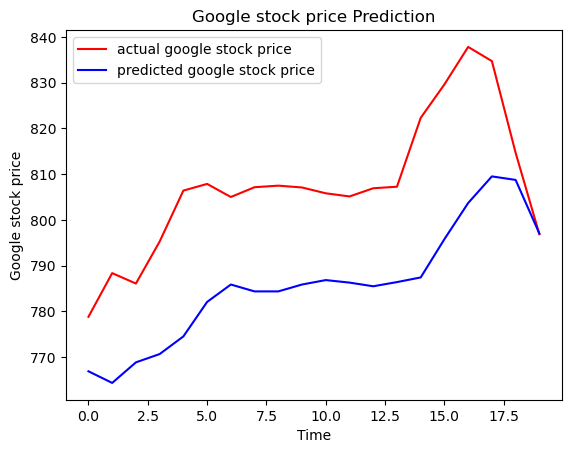

In [75]:
plt.plot(actual_stock_price, color ='red' ,label= 'actual google stock price')
plt.plot(predicted_stock_price, color ='blue' ,label= 'predicted google stock price')
plt.title('Google stock price Prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()